In [27]:
import pandas as pd
import numpy as np
import regex as re

import matplotlib.pyplot as plt

In [28]:
df = pd.read_parquet("fiqa-pl.parquet")
df.head()

,_id,title,text
0,3,,"Nie mówię, że nie podoba mi się też pomysł szk..."
1,31,,Tak więc nic nie zapobiega fałszywym ocenom po...
2,56,,Nigdy nie możesz korzystać z FSA dla indywidua...
3,59,,Samsung stworzył LCD i inne technologie płaski...
4,63,,Oto wymagania SEC: Federalne przepisy dotycząc...


### 1. Devise two regular expressions:
 - extracting times, e.g. recognizing 20:30 as an instance of a time.
 - extracting dates, e.g. recognizing 20 września as an instance of a date.

In [29]:
time_pattern = r'\b(?:[01]?\d|2[0-3]):[0-5]\d\b'
date_pattern = r'\b\d{1,2}\s+' \
             + r'(?:stycznia|lutego|marca|kwietnia|maja|czerwca|lipca|sierpnia|września|października|listopada|grudnia)' \
             + r'\b'

### 2. Search for occurrences of times and dates in the dataset.

In [30]:
times = df['text'].apply(lambda text: re.findall(time_pattern, text, re.IGNORECASE))
times = [match for sublist in times for match in sublist]

dates = df['text'].apply(lambda text: re.findall(date_pattern, text, re.IGNORECASE))
dates = [match for sublist in dates for match in sublist]

### 3 . Plot results from point 2:
 - for times create a bar plot for full hours (i.e. 17:35 -> is 17).
 - for dates create a bar plot for months.

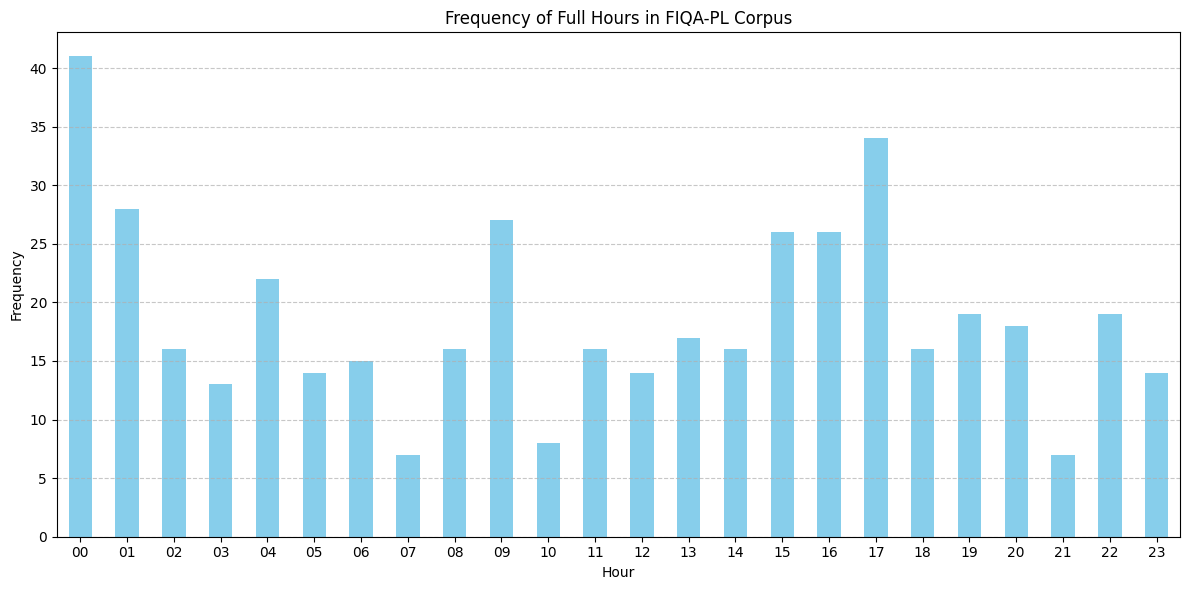

In [31]:
hours = [time.split(':')[0].zfill(2) for time in times]
hour_freqs = pd.Series(hours).value_counts().sort_index()

plt.figure(figsize=(12, 6))
hour_freqs.plot(kind='bar', color='skyblue')
plt.title('Frequency of Full Hours in FIQA-PL Corpus')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

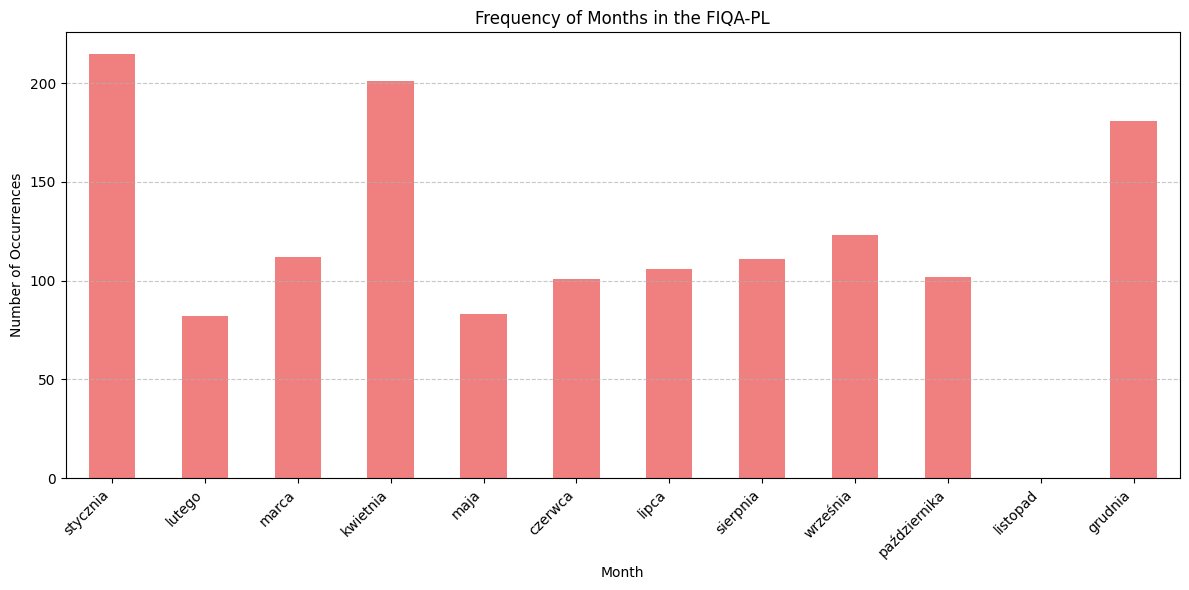

In [32]:
months = pd.Series([date.split()[-1].lower() for date in dates])
month_freqs = months.value_counts()
order = ['stycznia', 'lutego', 'marca', 'kwietnia',
         'maja', 'czerwca','lipca', 'sierpnia', 'września',
         'października', 'listopad', 'grudnia']
month_freqs = month_freqs.reindex(order, fill_value=0)

plt.figure(figsize=(12, 6))
month_freqs.plot(kind='bar', color='lightcoral')
plt.title('Frequency of Months in the FIQA-PL')
plt.xlabel('Month')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 4. Compute the number of occurrences of `kwiecień` word in any inflectional form. Use a compact form for the query. The only forbidden form is a juxtaposition of the month names, i.e. `"kwiecień|kwietnia|kwietniu..."`.

In [33]:
pattern_1 = r'\bkwiecień|kwiet\p{L}+\b'
matches = df['text'].apply(lambda text: re.findall(pattern_1, text, re.IGNORECASE))
matches = [match for sublist in matches for match in sublist]
print(f"Number of matches: {len(matches)}")
print(f"Unique variants of \'kwiecień\': {set(matches)}")

Number of matches: 362
Unique variants of 'kwiecień': {'KWIETNIA', 'kwietniowym', 'kwietniowej', 'kwietniową', 'kwietniowy', 'kwiecień', 'kwietniowych', 'kwietniu', 'kwietnia', 'Kwiecień', 'kwietniem'}


### 5. As in 4, but preceded by a number and a space.

In [34]:
pattern_2 = r'\b\d+\s+(?:kwiecień|kwiet\p{L}+)\b'
matches = df['text'].apply(lambda text: re.findall(pattern_2, text, re.IGNORECASE))
matches = [match for sublist in matches for match in sublist]
print(f"Number of matches: {len(matches)}")
print(f"Example: \'{matches[0]}\'")

Number of matches: 201
Example: '2 kwietnia'


### 6. As in 4, but not preceded by a number and a space. Check if the results from 5 and 6 sum to 4.

In [35]:
pattern_3 = r'(?<!\d\s+)(?:kwiecień|kwiet\p{L}+)\b'
matches = df['text'].apply(lambda text: re.findall(pattern_3, text, re.IGNORECASE))
matches = [match for sublist in matches for match in sublist]
print(f"Number of matches: {len(matches)}")
print(f"Example: \'{matches[0]}\'")

Number of matches: 161
Example: 'kwietniu'


### 7. Ask an LLM (e.g. [Bielik](https://chat.bielik.ai/)) to complete these tasks for you. Compare and criticize the code generated by the LLM.

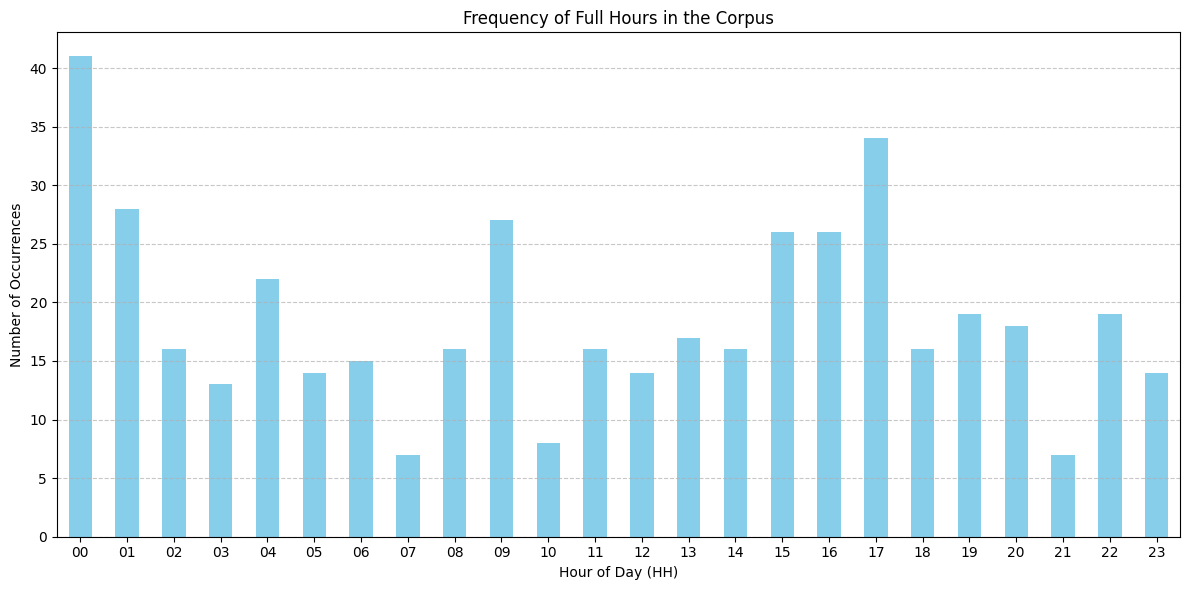

✅ Time plot generated.


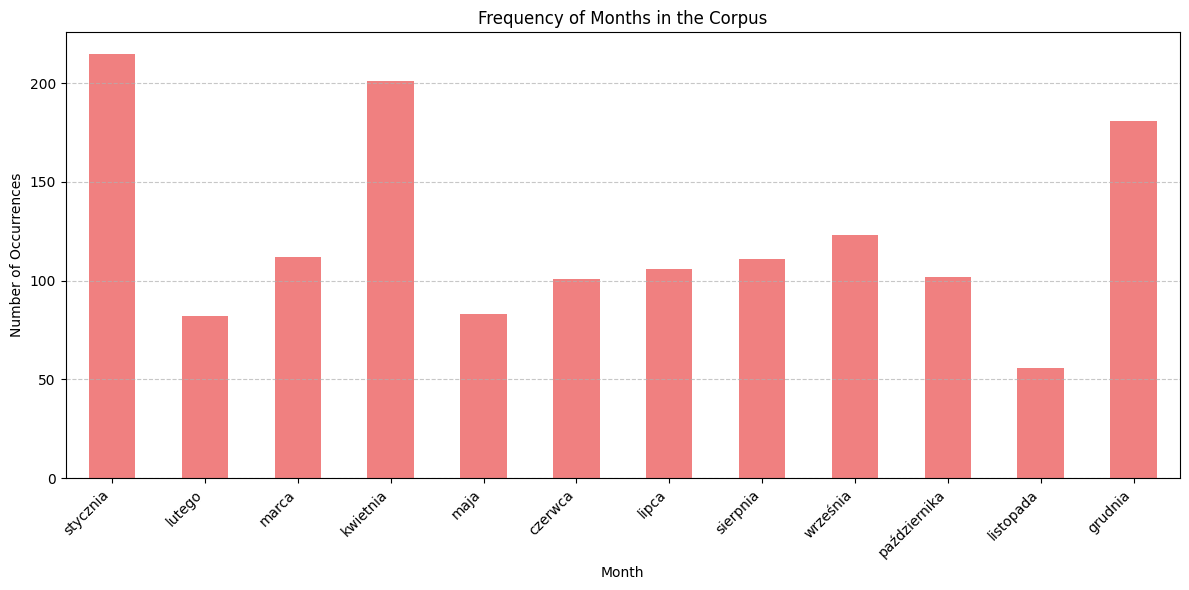

✅ Date plot generated.


In [36]:
import pandas as pd
import regex as re
import matplotlib.pyplot as plt

# --- 0. Placeholder Data (Replace with your actual df loading) ---
# df = pd.read_parquet("corpus.parquet") 
# For demonstration:
df = pd.read_parquet("fiqa-pl.parquet")

# --- 1. Define Regex Patterns ---
TIME_REGEX = r'\b(?:[01]?\d|2[0-3]):[0-5]\d\b'
POLISH_MONTHS = r'(?:stycznia|lutego|marca|kwietnia|maja|czerwca|lipca|sierpnia|września|października|listopada|grudnia)'
DATE_REGEX = r'\b\d{1,2}\s+' + POLISH_MONTHS + r'\b'

# --- 2. Search for Occurrences ---

def extract_matches(text, pattern):
    """Safely extract all matches using the regex library."""
    if pd.isna(text):
        return []
    return re.findall(pattern, str(text), re.IGNORECASE)

# Extract and flatten all time matches
time_series = df['text'].apply(lambda text: extract_matches(text, TIME_REGEX))
all_times = [match for sublist in time_series for match in sublist]

# Extract and flatten all date matches
date_series = df['text'].apply(lambda text: extract_matches(text, DATE_REGEX))
all_dates = [match for sublist in date_series for match in sublist]

# --- 3. Plot Results ---

# A. Times: Bar Plot for Full Hours
full_hours = [time.split(':')[0].zfill(2) for time in all_times]
hour_counts = pd.Series(full_hours).value_counts().sort_index()

plt.figure(figsize=(12, 6))
hour_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Full Hours in the Corpus')
plt.xlabel('Hour of Day (HH)')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("✅ Time plot generated.")

# B. Dates: Bar Plot for Months
polish_month_order = [
    'stycznia', 'lutego', 'marca', 'kwietnia', 'maja', 'czerwca',
    'lipca', 'sierpnia', 'września', 'października', 'listopada', 'grudnia'
]
all_months = [date.split()[-1].lower() for date in all_dates]

# Count, then re-index to enforce chronological order
month_counts = pd.Series(all_months).value_counts().reindex(polish_month_order, fill_value=0)

plt.figure(figsize=(12, 6))
month_counts.plot(kind='bar', color='lightcoral')
plt.title('Frequency of Months in the Corpus')
plt.xlabel('Month')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("✅ Date plot generated.")

In [37]:
# The compact month pattern (pattern_1 for later tasks)
KWIECEIN_INFLECTION_PATTERN = r'(?:kwiecień|kwiet\p{L}+)'
TASK_4_REGEX = r'\b' + KWIECEIN_INFLECTION_PATTERN + r'\b'

# --- Compute Task 4 Total ---
task_4_series = df['text'].apply(lambda text: extract_matches(text, TASK_4_REGEX))
all_task_4_matches = [match for sublist in task_4_series for match in sublist]
total_occurrences_task_4 = len(all_task_4_matches)

print("\n" + "="*50)
print(f"4. Total occurrences of 'kwiecień' (compact regex): {total_occurrences_task_4}")


4. Total occurrences of 'kwiecień' (compact regex): 362


In [38]:
# Task 5: Preceded by number and space (\b\d+\s+)
TASK_5_REGEX = r'\b\d+\s+' + KWIECEIN_INFLECTION_PATTERN + r'\b'

# --- Compute Task 5 Count ---
task_5_series = df['text'].apply(lambda text: extract_matches(text, TASK_5_REGEX))
all_task_5_matches = [match for sublist in task_5_series for match in sublist]
occurrences_task_5_count = len(all_task_5_matches)

print(f"5. Occurrences preceded by number and space: {occurrences_task_5_count}")

5. Occurrences preceded by number and space: 201


In [39]:
# Task 6: NOT preceded by number and space ((?<!\d\s+))
TASK_6_REGEX = r'(?<!\d\s+)' + KWIECEIN_INFLECTION_PATTERN + r'\b'

# --- Compute Task 6 Count ---
task_6_series = df['text'].apply(lambda text: extract_matches(text, TASK_6_REGEX))
all_task_6_matches = [match for sublist in task_6_series for match in sublist]
occurrences_task_6_count = len(all_task_6_matches)

print(f"6. Occurrences NOT preceded by number and space: {occurrences_task_6_count}")

# --- Verification ---
sum_of_5_and_6 = occurrences_task_5_count + occurrences_task_6_count

print("\n" + "="*50)
print("VERIFICATION: Task 5 + Task 6 = Task 4")
print("="*50)
print(f"Total (Task 4): {total_occurrences_task_4}")
print(f"Sum (Task 5 + 6): {occurrences_task_5_count} + {occurrences_task_6_count} = {sum_of_5_and_6}")

if sum_of_5_and_6 == total_occurrences_task_4:
    print("✅ CHECK PASSED: The results from 5 and 6 sum to the result from 4.")
else:
    print("❌ CHECK FAILED: Discrepancy detected.")

6. Occurrences NOT preceded by number and space: 161

VERIFICATION: Task 5 + Task 6 = Task 4
Total (Task 4): 362
Sum (Task 5 + 6): 201 + 161 = 362
✅ CHECK PASSED: The results from 5 and 6 sum to the result from 4.


### LLM Critique
 - The LLM generated code is verbose. It does not generalize well and it's use of overtly descriptive comments makes following the execution of code harder. If we wanted to, for example, separate it into a module we'd have to format it differently.
 - Both me and the LLM use a Negative Lookbehind pattern in task 6. Whilst it's easy to write some regex engines require negative lookbehind to be fixed width.

Answer the following questions (2 points):
1. **Are regular expressions good at capturing times?**  
    Regex does a very good job at separating time from other data mostly because it's such a simple format. If the time included other information like timezones the task would be much harder.
2. **Are regular expressions good at capturing dates?**  
    Regular expressions do a good enough job at capturing dates however that's only the case here because a polish native wrote the regex to match all correct inflectional forms of the months. If we were tasked with regex matching a large multi-lingual dataset for dates the task would be much harder.
3. **How one can be sure that the expression has matched all and only the correct expressions of a given type?**  
    Depends on the type of data we have. If the data we have are, for example, logs with standardized date and time a regex expression will match all occurances according to the specification of the data. However in NLP we're often faced with irregular data gathered from unstandardized sources. We can make subpatterns for the word like I've done in the case of the word 'kwiecień' by matching anything containing 'kwiet'. However if the data was written by a human typos like 'kwecień' will not be picked up by a regex pattern. In conclusion the more irregular the data the more complex the regex and the less protection we have against potential missed matches.
4. **Is LLM able to generate regular expressions?**  
    In short LLMs do a wonderful job of building regular expressions. That's to be expected since regex are formally a language with a very simple deterministic syntax and LLMs excel at this type of task.